# Gradient Boosting Machines

In [119]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Dataset

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [120]:
df =  pd.read_csv('CS50/Python/CSV files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
# Map Yes -> 1 and No -> 0 AND Male -> 1 and Female ->0 for numerical processing
columns_to_map = ['Partner', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling','Dependents', 'PhoneService', 'Churn', 'OnlineBackup']
df[columns_to_map] = df[columns_to_map].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df = df.drop(columns=['customerID', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', ])

# Convert floats to ints
columns_to_int = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
                  , 'MonthlyCharges']
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df[columns_to_int] = df[columns_to_int].fillna(0)  # Replace NaN with 0
df[columns_to_int] = df[columns_to_int].replace([np.inf, -np.inf], 0)  # Replace inf/-inf with 0


df[columns_to_int] = df[columns_to_int].astype(int)


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29,29.85,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56,1889.50,0
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53,108.15,1
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70,151.65,1


<Axes: >

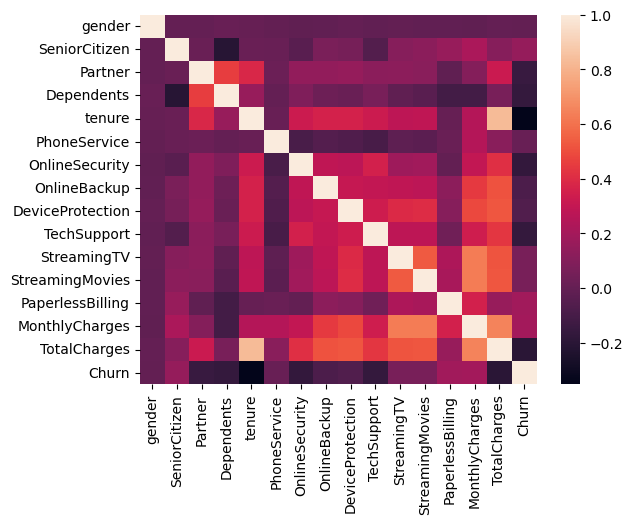

In [122]:
sns.heatmap(df.corr())

In [123]:
X = df.drop(columns=['TotalCharges', 'TechSupport', 'OnlineSecurity', 'tenure', 'DeviceProtection',
                      'OnlineBackup', 'Dependents', 'Partner', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
gbm_model_classifier = GradientBoostingClassifier(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.5,    # Step size for each tree
    max_depth=5,          # Depth of individual trees
    random_state=42
)
gbm_model_regressor = GradientBoostingRegressor(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.05,    # Step size for each tree
    max_depth=5,          # Depth of individual trees
    random_state=42
)

# Training and Testing

In [125]:
# Training for the GradientBoostingClassifier
gbm_model_classifier.fit(X_train, y_train)

# Training for the GradientBoostingRegression
gbm_model_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42)

In [126]:
# Testing for the GradientBoostingClassifier
y_pred_class = gbm_model_classifier.predict(X_test)


#Accuracy of the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [127]:
# Testing for the GradientBoostingRegressor
y_pred_regressor = gbm_model_regressor.predict(X_test)

# Mean square of the model
mse = mean_squared_error(y_test, y_pred_regressor)
print(f"Mean Square Error: {mse:.2f}")


Mean Square Error: 0.16


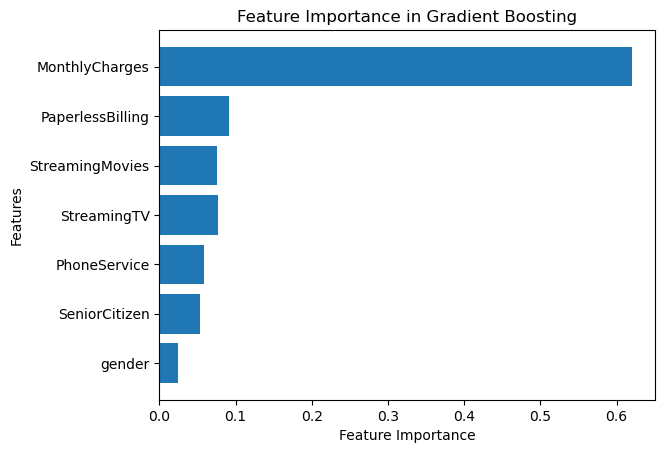

In [128]:
# For Regressor
feature_importance = gbm_model_regressor.feature_importances_

# For Classifier
# feature_importance = gbm_classifier.feature_importances_

plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting')
plt.show()
